In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import optuna
import shap

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder         
from sklearn.model_selection import StratifiedKFold


d:\01 Professional software operation\miniconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

folder_path = 'S_TC-figure'

# 检查文件夹是否存在，如果不存在则创建它
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"文件夹 {folder_path} 已创建。")

In [3]:
df = pd.read_excel(r"F:\codes\00-WORK\work-1\01-myself\01-predict\01-Pre_S_TC\EXCEL\S_TC._s.xlsx",  dtype={'DIPOCE': str, 'BA_Code': str, 'Cata_Code': str})
df

,DIPOCE,DI_NCO,PO_HV,PO_f,BA_Code,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,...,R,CHS,AB_Mix_T,Q,Cata_Code,MCS,TC_Method,TC_t,Closed_CC,S_TC
0,0110000000,31.25,440.000000,NaN,1001,60.065672,76.923077,12.307692,2.307692,2.307692,...,1.233,56.500000,15.0,228.0,100000,227.5,1,NaN,NaN,NaN
1,0110000000,31.25,430.000000,4.100000,1000,18.000000,66.666667,1.333333,1.333333,2.000000,...,1.457,60.000000,8.0,1368.0,011010,NaN,2,NaN,NaN,NaN
2,0110100000,31.00,367.991736,4.464132,1000,18.000000,67.567568,2.182432,1.013514,1.013514,...,1.830,59.700000,NaN,0.0,100000,108.6,1,283.15,90.8,0.661957
3,0110100000,31.00,367.991736,4.464132,1000,18.000000,67.567568,2.182432,1.013514,1.013514,...,1.830,59.700000,NaN,0.0,100000,94.1,1,283.15,90.8,NaN
4,0100010000,31.50,440.000000,NaN,1000,18.000000,50.676157,1.494662,1.010676,0.455516,...,1.100,58.400000,10.0,0.0,100100,310.0,1,297.15,88.9,0.736923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,0100010000,31.00,416.000000,2.000000,1000,18.000000,73.421439,2.276065,1.101322,0.367107,...,1.100,57.662997,5.0,48.0,100000,NaN,1,283.15,20.4,0.979101
524,0100010000,31.00,416.000000,2.000000,1000,18.000000,80.515298,1.328502,1.207729,0.402576,...,1.100,55.396967,5.0,48.0,100000,NaN,1,283.15,15.9,0.668793
525,0100010000,31.00,416.000000,2.000000,1000,18.000000,84.104289,0.849453,1.261564,0.420521,...,1.100,54.317040,5.0,48.0,100000,NaN,1,283.15,19.5,0.488807
526,0100010000,31.00,416.000000,2.000000,1000,18.000000,85.251492,0.699062,1.278772,0.426257,...,1.100,53.980672,5.0,48.0,100000,NaN,1,283.15,34.5,0.414447


In [4]:
df = df.dropna(subset=['S_TC'])
df

,DIPOCE,DI_NCO,PO_HV,PO_f,BA_Code,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,...,R,CHS,AB_Mix_T,Q,Cata_Code,MCS,TC_Method,TC_t,Closed_CC,S_TC
2,0110100000,31.0,367.991736,4.464132,1000,18.0,67.567568,2.182432,1.013514,1.013514,...,1.83,59.700000,NaN,0.0,100000,108.6,1,283.15,90.8,0.661957
4,0100010000,31.5,440.000000,NaN,1000,18.0,50.676157,1.494662,1.010676,0.455516,...,1.10,58.400000,10.0,0.0,100100,310.0,1,297.15,88.9,0.736923
5,0100100100,31.5,429.326712,NaN,1000,18.0,32.931727,0.975330,0.659782,0.295468,...,1.10,63.500000,10.0,0.0,100100,220.0,1,297.15,89.9,0.763830
6,0100100100,31.5,418.118624,NaN,1000,18.0,30.906059,0.990550,0.617009,0.278488,...,1.10,64.600000,10.0,0.0,100100,210.0,1,297.15,84.2,0.928247
7,0100100100,31.5,406.184223,NaN,1000,18.0,29.056604,0.862534,0.582210,0.264151,...,1.10,65.000000,10.0,0.0,100100,280.0,1,297.15,68.9,0.989474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,0100010000,31.0,416.000000,2.000000,1000,18.0,73.421439,2.276065,1.101322,0.367107,...,1.10,57.662997,5.0,48.0,100000,NaN,1,283.15,20.4,0.979101
524,0100010000,31.0,416.000000,2.000000,1000,18.0,80.515298,1.328502,1.207729,0.402576,...,1.10,55.396967,5.0,48.0,100000,NaN,1,283.15,15.9,0.668793
525,0100010000,31.0,416.000000,2.000000,1000,18.0,84.104289,0.849453,1.261564,0.420521,...,1.10,54.317040,5.0,48.0,100000,NaN,1,283.15,19.5,0.488807
526,0100010000,31.0,416.000000,2.000000,1000,18.0,85.251492,0.699062,1.278772,0.426257,...,1.10,53.980672,5.0,48.0,100000,NaN,1,283.15,34.5,0.414447


In [5]:
missing_rate = df.isnull().sum() / len(df)
# print(missing_rate)
# 找出缺失值比例大于 0.5 的列
cols_to_drop = missing_rate[missing_rate > 0.5].index
#打印缺失值比例大于 0.5 的列的缺失率
print("缺失值比例大于 0.5 的列：")
print(missing_rate[missing_rate > 0.5])

缺失值比例大于 0.5 的列：
Series([], dtype: float64)


In [6]:
# 删除缺失值比例大于 0.5 的列
df.drop(columns=cols_to_drop, inplace=True)
df.shape

C:\Users\Administrator\AppData\Local\Temp\ipykernel_43812\510925555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=cols_to_drop, inplace=True)


(288, 23)

<Axes: xlabel='S_TC', ylabel='Count'>

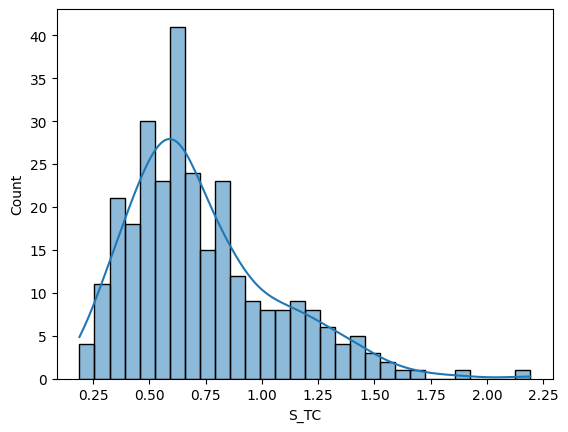

In [7]:
sns.histplot(df['S_TC'], kde=True,bins=30)

In [8]:
df.describe()

,DI_NCO,PO_HV,PO_f,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,C_BA_MR,M_loss,Yield,R,CHS,AB_Mix_T,Q,MCS,TC_Method,TC_t,Closed_CC,S_TC
count,254.000000,254.000000,149.000000,235.000000,267.000000,253.000000,241.000000,246.000000,260.000000,262.000000,247.000000,287.000000,259.000000,202.000000,213.000000,201.000000,288.000000,217.000000,144.000000,288.000000
mean,31.456299,446.836617,5.274807,32.370834,64.987291,5.371817,1.558173,1.132766,0.140386,9.015105,94.097494,1.205303,61.048916,12.148515,108.578535,330.334826,1.322917,297.456452,72.902917,0.732650
std,0.656165,169.567921,2.747031,34.995225,20.190587,7.512217,0.530202,0.843901,0.079720,10.293593,6.900656,0.265286,7.572784,6.976701,267.409620,193.423163,0.771822,13.567368,28.490697,0.329370
min,30.000000,211.000000,2.000000,0.000000,1.000000,0.000000,0.399489,0.000000,0.000000,0.000000,64.652956,0.800000,32.800000,5.000000,-48.000000,20.000000,0.000000,283.150000,9.000000,0.189655
25%,31.000000,364.675443,3.681967,18.000000,53.764995,1.304348,1.150000,0.667500,0.083333,3.848743,93.993760,1.100000,56.350000,7.000000,0.000000,180.000000,1.000000,293.150000,57.770000,0.507133
50%,31.400000,416.989593,4.600000,18.000000,64.000000,2.030000,1.550000,1.057000,0.120556,5.110169,96.884711,1.100000,61.500000,10.000000,0.000000,302.000000,1.000000,297.150000,88.400000,0.648770
75%,31.500000,450.000000,6.000000,18.000000,78.384988,3.240741,1.860000,1.464624,0.184750,8.147407,97.820444,1.250000,64.956140,15.000000,48.000000,446.000000,1.000000,298.150000,92.545000,0.894668
max,33.600000,1365.168399,16.000000,148.100000,126.000000,30.500000,4.300000,4.250000,0.278000,68.750000,100.000000,2.400000,76.784678,30.000000,1368.000000,900.000000,3.000000,343.150000,99.000000,2.192513


In [9]:
# 重置索引
df.reset_index(drop=True, inplace=True)


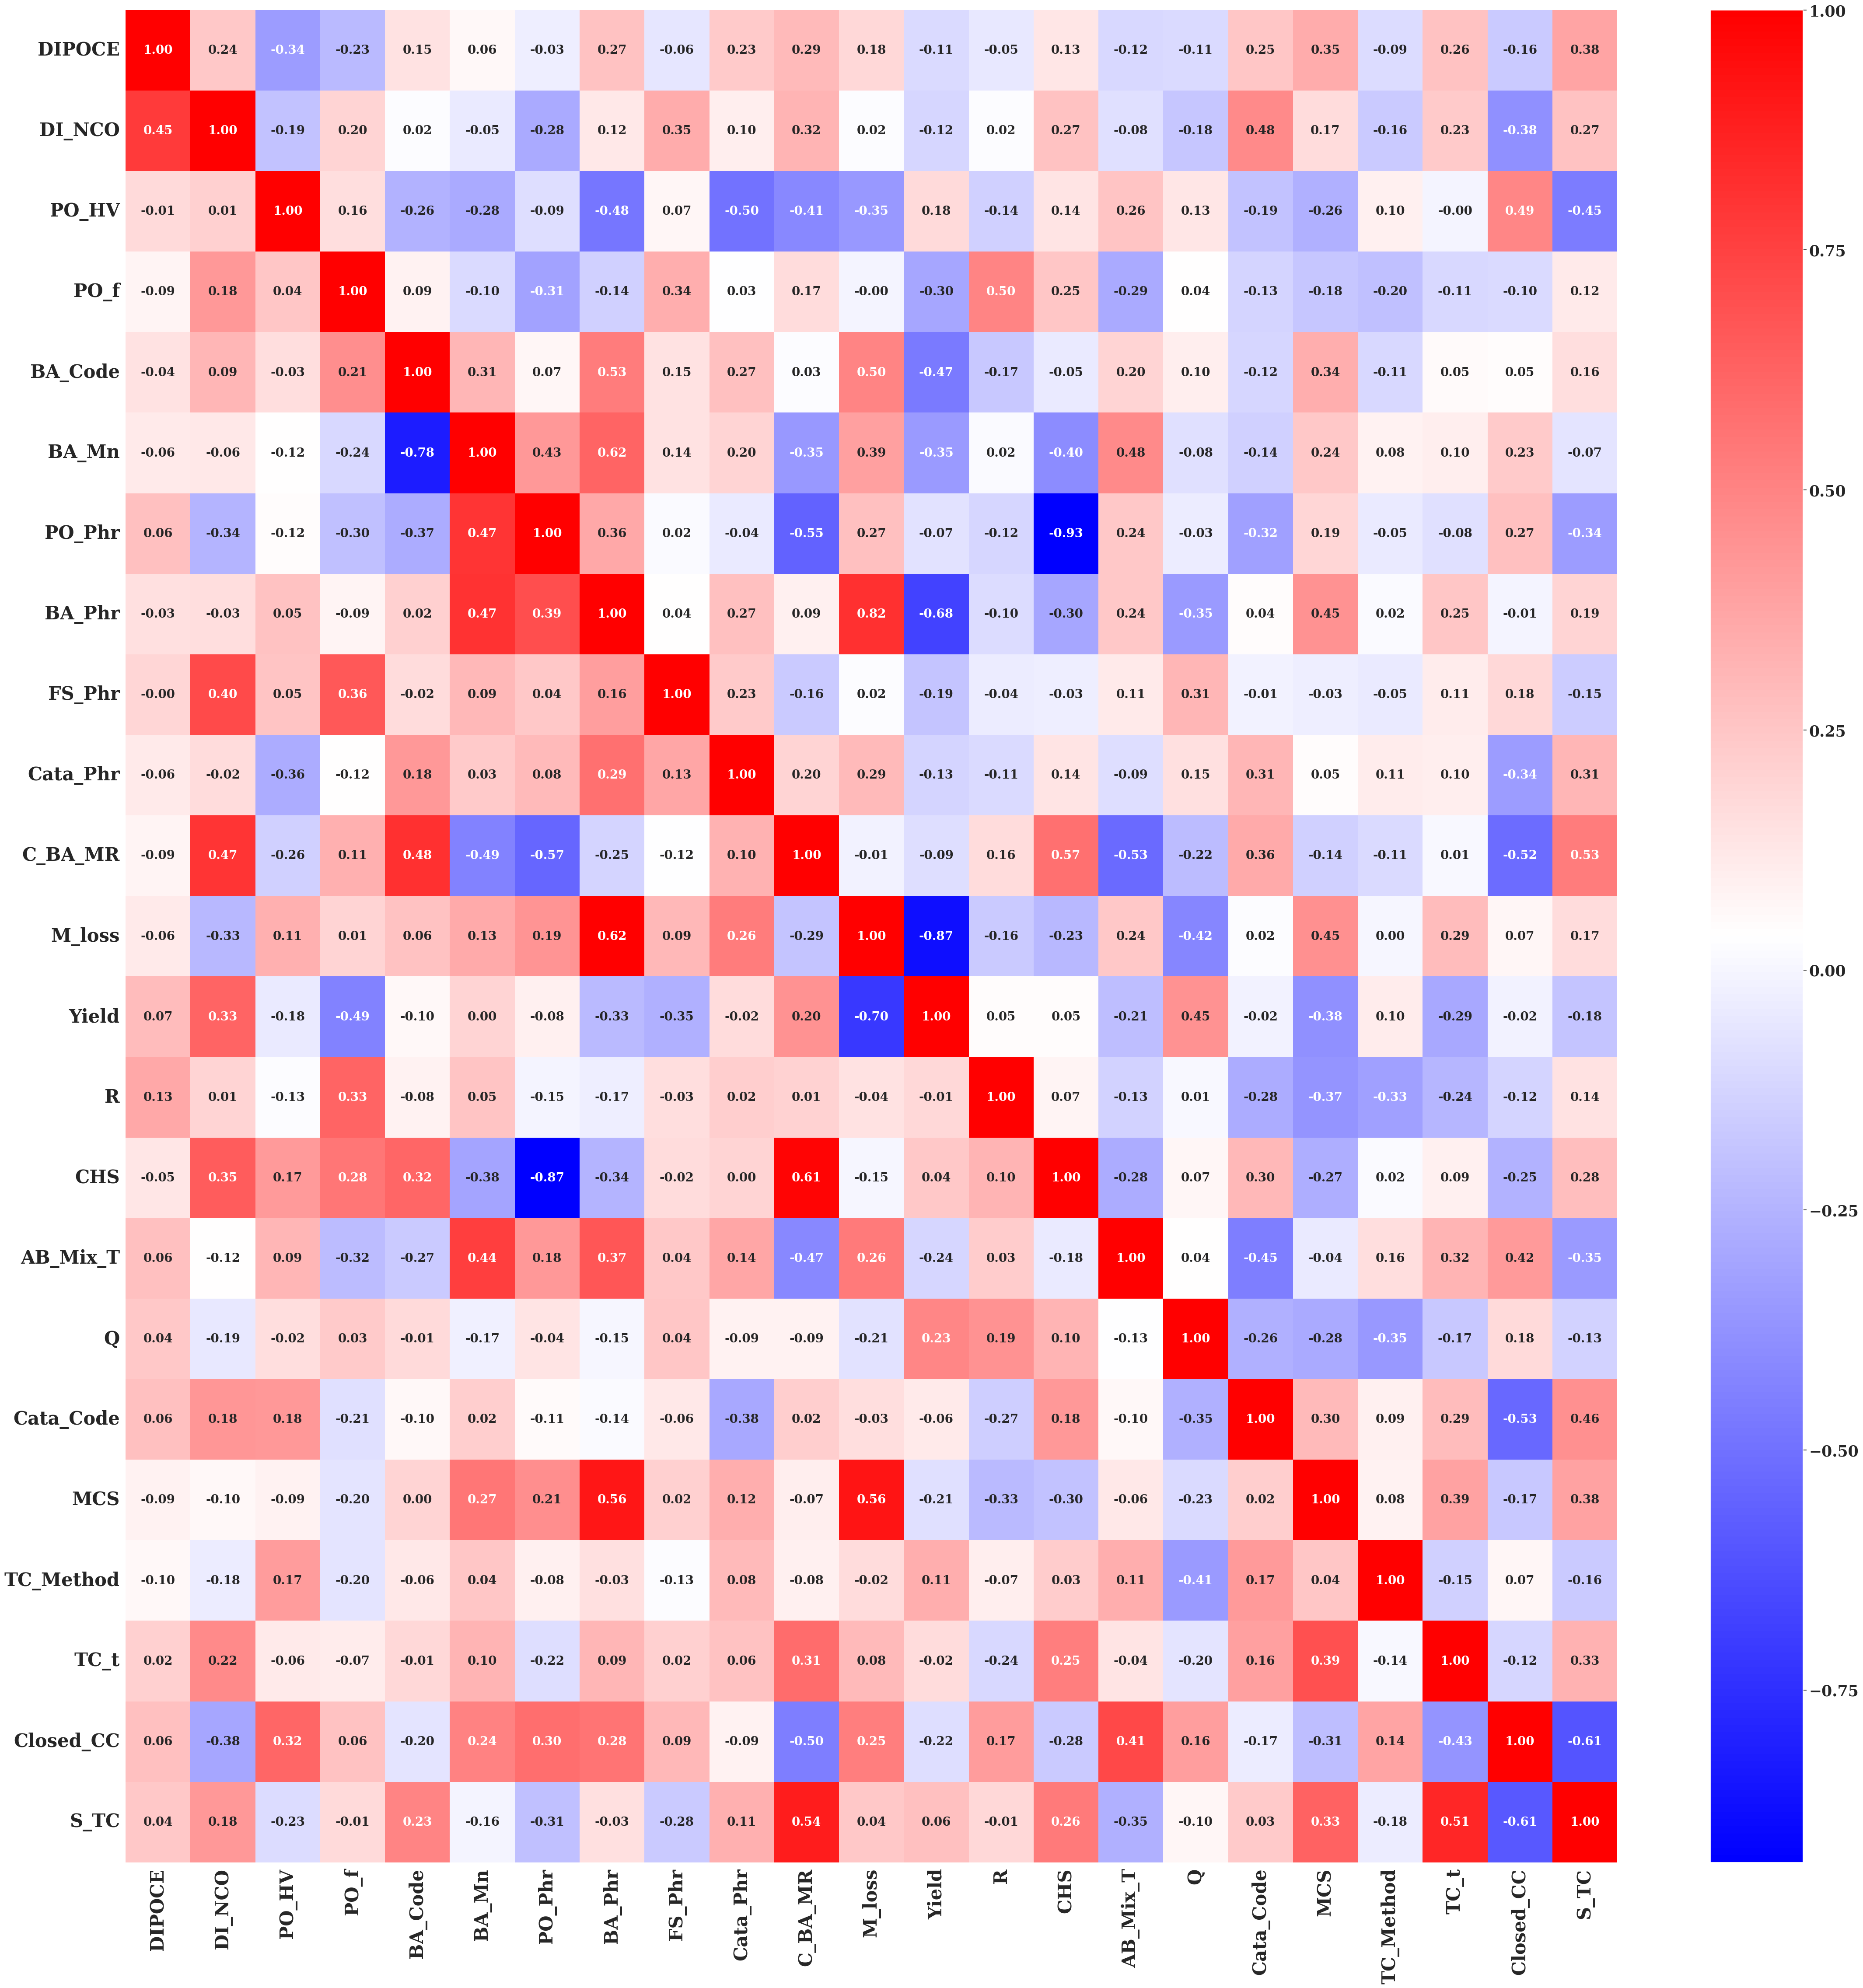

In [11]:
# 绘制相关矩阵图
plt.rc('font', family='serif', size=18, weight="bold")
plt.figure(figsize=(55, 55))

# 计算相关系数矩阵
corr_s = df.corr('spearman')
corr_p = df.corr()

# 生成掩码以将上下半三角分开
mask_upper = np.tril(np.ones(corr_p.shape), k=-1).astype(bool)
mask_lower = np.triu(np.ones(corr_s.shape), k=0).astype(bool)

# 绘制热图
h = sns.heatmap(corr_s, mask=mask_upper, cmap="bwr", annot=True, fmt='.2f', cbar=False, annot_kws={"size": 20})
h = sns.heatmap(corr_p, mask=mask_lower, cmap="bwr", annot=True, fmt='.2f', cbar=False, annot_kws={"size": 20})

# 显示 colorbar
cb = h.figure.colorbar(h.collections[0])
cb.ax.tick_params(labelsize=25)

# 设置字体和刻度
sns.set(font_scale=1.5)
plt.xticks(fontsize=30, rotation=90, weight="bold")
plt.yticks(fontsize=30, rotation=0, weight="bold")

# 保存图像
plt.rcParams['savefig.dpi'] = 300
plt.savefig(os.path.join(folder_path, 'S_TC_model相关矩阵图.png'), dpi=600, bbox_inches='tight')

plt.show()


In [ ]:
import numpy as np
import pandas as pd
from matimpute import MatImputer

mat_impute = MatImputer()
df = mat_impute.transform(df)
df.to_csv("S_TC_填充.csv", index=False)

y = df['S_TC']
# y = df["CS(KPa)"]
X = df.drop(["S_TC"], axis=1)
X

d:\01 Professional software operation\minicondaa\envs\wone\lib\site-packages\matimpute\MatImpute.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df_col_filled[col]
d:\01 Professional software operation\minicondaa\envs\wone\lib\site-packages\matimpute\MatImpute.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df_col_filled[col]
d:\01 Professional software operation\minicondaa\envs\wone\lib\site-packages\matimpute\MatImpute.py:71: SettingWithCopyWarning: 
A value is trying to be s

,DIPOCE,DI_NCO,PO_HV,PO_f,BA_Code,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,...,Yield,R,CHS,AB_Mix_T,Q,Cata_Code,MCS,TC_Method,TC_t,Closed_CC
0,0110100000,31.0,367.991736,4.464132,1000,18.0,67.567568,2.182432,1.013514,1.013514,...,96.884711,1.83,59.700000,5.15,0.0,100000,108.600,1,283.15,90.8
1,0100010000,31.5,440.000000,3.244903,1000,18.0,50.676157,1.494662,1.010676,0.455516,...,97.017857,1.10,58.400000,10.00,0.0,100100,310.000,1,297.15,88.9
2,0100100100,31.5,429.326712,3.320142,1000,18.0,32.931727,0.975330,0.659782,0.295468,...,97.377587,1.10,63.500000,10.00,0.0,100100,220.000,1,297.15,89.9
3,0100100100,31.5,418.118624,3.479769,1000,18.0,30.906059,0.990550,0.617009,0.278488,...,97.428971,1.10,64.600000,10.00,0.0,100100,210.000,1,297.15,84.2
4,0100100100,31.5,406.184223,3.681812,1000,18.0,29.056604,0.862534,0.582210,0.264151,...,97.478380,1.10,65.000000,10.00,0.0,100100,280.000,1,297.15,68.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0100010000,31.0,416.000000,2.000000,1000,18.0,73.421439,2.276065,1.101322,0.367107,...,96.859603,1.10,57.662997,5.00,48.0,100000,280.421,1,283.15,20.4
284,0100010000,31.0,416.000000,2.000000,1000,18.0,80.515298,1.328502,1.207729,0.402576,...,98.229830,1.10,55.396967,5.00,48.0,100000,251.798,1,283.15,15.9
285,0100010000,31.0,416.000000,2.000000,1000,18.0,84.104289,0.849453,1.261564,0.420521,...,98.887437,1.10,54.317040,5.00,48.0,100000,245.909,1,283.15,19.5
286,0100010000,31.0,416.000000,2.000000,1000,18.0,85.251492,0.699062,1.278772,0.426257,...,99.089386,1.10,53.980672,5.00,48.0,100000,241.445,1,283.15,34.5


In [12]:
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optuna目标函数
def objective(trial):
    param_grid = {
        'iterations': trial.suggest_int('iterations', 1000, 1500, step=100),
        'depth': trial.suggest_int('depth', 6, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, step=0.01),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 2, 5),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.1, 1.0),
        'border_count': trial.suggest_int('border_count', 128, 254),
    }
    model = CatBoostRegressor(
        **param_grid,
        random_seed=42,
        verbose=0
    )

    # 五折交叉验证返回R²均值
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='r2', n_jobs=-1)
    return score.mean()

# 创建并运行Optuna调参
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# 输出最优超参数
print("Best hyperparameters:", study.best_params)

[I 2025-08-05 22:00:45,588] A new study created in memory with name: no-name-9ec59ea9-18cc-4854-bcd8-3dd12ae7ce1d
[I 2025-08-05 22:00:58,916] Trial 0 finished with value: 0.872962645396214 and parameters: {'iterations': 1000, 'depth': 7, 'learning_rate': 0.02, 'l2_leaf_reg': 4.431232306066091, 'bagging_temperature': 0.6581174746690266, 'border_count': 183}. Best is trial 0 with value: 0.872962645396214.
[I 2025-08-05 22:01:05,829] Trial 1 finished with value: 0.8801540021121147 and parameters: {'iterations': 1100, 'depth': 6, 'learning_rate': 0.03, 'l2_leaf_reg': 3.452448292195222, 'bagging_temperature': 0.5346467396723031, 'border_count': 135}. Best is trial 1 with value: 0.8801540021121147.
[I 2025-08-05 22:01:37,294] Trial 2 finished with value: 0.8554473254667684 and parameters: {'iterations': 1000, 'depth': 10, 'learning_rate': 0.03, 'l2_leaf_reg': 4.542303660370797, 'bagging_temperature': 0.9569113448342557, 'border_count': 156}. Best is trial 1 with value: 0.8801540021121147.
[I

Best hyperparameters: {'iterations': 1500, 'depth': 6, 'learning_rate': 0.06999999999999999, 'l2_leaf_reg': 3.320062765406631, 'bagging_temperature': 0.4303725385471682, 'border_count': 243}


In [14]:
Best_hyperparameters = study.best_params
Best_hyperparameters

{'iterations': 1500,
 'depth': 6,
 'learning_rate': 0.06999999999999999,
 'l2_leaf_reg': 3.320062765406631,
 'bagging_temperature': 0.4303725385471682,
 'border_count': 243}

In [15]:
# 创建模型并训练
best_model = CatBoostRegressor(**Best_hyperparameters, random_seed=42, verbose=0)
best_model.fit(X_train, y_train)

# 预测
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# 评估指标计算
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = math.sqrt(mse_train)
rmse_test = math.sqrt(mse_test)

# 打印结果
print("Performance on Training Set:")
print(f"  R²   : {r2_train:.4f}")
print(f"  MAE  : {mae_train:.4f}")
print(f"  MSE  : {mse_train:.4f}")
print(f"  RMSE : {rmse_train:.4f}")

print("\nPerformance on Test Set:")
print(f"  R²   : {r2_test:.4f}")
print(f"  MAE  : {mae_test:.4f}")
print(f"  MSE  : {mse_test:.4f}")
print(f"  RMSE : {rmse_test:.4f}")

Performance on Training Set:
  R²   : 1.0000
  MAE  : 0.0009
  MSE  : 0.0000
  RMSE : 0.0011

Performance on Test Set:
  R²   : 0.8540
  MAE  : 0.0762
  MSE  : 0.0151
  RMSE : 0.1228


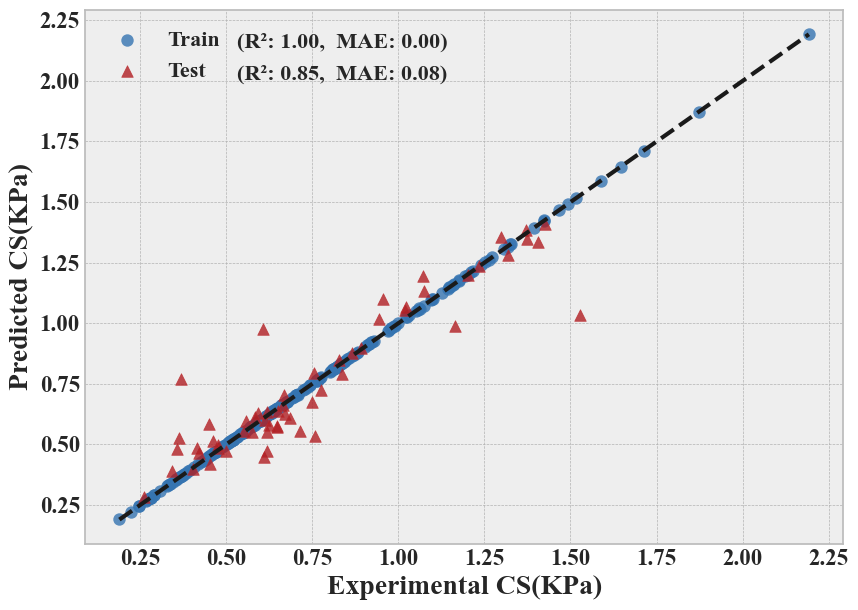

In [16]:
# 设置字体和样式
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 20
plt.style.use('bmh')

# 创建图形
plt.figure(figsize=(9, 6.5))

# 训练集散点图
train_scatter = plt.scatter(y_train, y_pred_train, s=80, alpha=0.8, marker='o', facecolors='#3574B1', edgecolors='#3574B1', linewidths=0)
plt.text(0.2, 0.93, f'(R²: {r2_train:.2f},  MAE: {mae_train:.2f})', fontsize=16, transform=plt.gca().transAxes)

# 测试集散点图
test_scatter = plt.scatter(y_test, y_pred_test, s=70, marker='^', alpha=0.8, facecolors='#b01f24', edgecolors='#BB2A2D')
plt.text(0.2, 0.87, f'(R²: {r2_test:.2f},  MAE: {mae_test:.2f})', fontsize=16, transform=plt.gca().transAxes)

# 绘制完美预测线（y=x）
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)

# 添加图例
plt.legend([train_scatter, test_scatter], ['Train', 'Test'], fontsize=16, loc='best', frameon=False)

# 添加标签
plt.xlabel('Experimental CS(KPa)', weight='bold', fontsize=20, fontname='Times New Roman')
plt.ylabel('Predicted CS(KPa)', weight='bold', fontsize=20, fontname='Times New Roman')

# 显示图形
plt.tight_layout()
plt.show()

In [17]:
# 定义评估函数，计算并返回R²、MAE、MSE、RMSE
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return r2, mae, mse, rmse

# 用于存储每一折的评估指标
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []
fold_rmse_scores = []

# 用于存储所有预测值和真实值
predictions = []
actuals = []

# 用于存储每一折的结果
results = []

# 设置五折交叉验证
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# 进行五折交叉验证
for fold, (train_index, val_index) in enumerate(kf.split(X), start=1):
    # 划分训练集和验证集
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # 训练模型
    best_model.fit(X_train, y_train)

    # 在验证集上进行预测
    y_pred_val = best_model.predict(X_val)
    y_pred_train = best_model.predict(X_train)

    # 存储预测结果和真实值
    predictions.append(y_pred_val)
    actuals.append(y_val)

    # 计算训练集和验证集的评估指标
    r2_train, mae_train, mse_train, rmse_train = evaluate_model(y_train, y_pred_train)
    fold_r2, fold_mae, fold_mse, fold_rmse = evaluate_model(y_val, y_pred_val)

    # 保存每一折的评估指标
    fold_r2_scores.append(fold_r2)
    fold_mae_scores.append(fold_mae)
    fold_mse_scores.append(fold_mse)
    fold_rmse_scores.append(fold_rmse)

    # 存储结果
    results.append({
        'Fold': fold,
        'r2_train': r2_train,
        'r2_val': fold_r2,
        'mae_train': mae_train,
        'mae_val': fold_mae,
        'mse_train': mse_train,
        'mse_val': fold_mse,
        'rmse_train': rmse_train,
        'rmse_val': fold_rmse
    })

# 将结果转换为DataFrame
df_results = pd.DataFrame(results)
df_results

# 合并所有预测结果和实际值
all_predictions = np.concatenate(predictions)
all_actuals = np.concatenate(actuals)

In [18]:
cols = df_results.drop('Fold', axis=1).columns
# 计算平均值和标准差
mean = df_results[cols].mean()
std = df_results[cols].std()

# 生成中间加减的形式并保留两位小数
result = mean.round(2).astype(str) + ' ± ' + std.round(2).astype(str)
print(result)

r2_train        1.0 ± 0.0
r2_val        0.85 ± 0.01
mae_train       0.0 ± 0.0
mae_val       0.08 ± 0.01
mse_train       0.0 ± 0.0
mse_val        0.02 ± 0.0
rmse_train      0.0 ± 0.0
rmse_val      0.13 ± 0.01
dtype: object


In [19]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# 计算全体实验值（真实值）的标准差
std_all_actuals = np.std(all_actuals)

# 添加 NMAE 列（每一折的 MAE / std）
df_results['nmae_val'] = df_results['mae_val'] / std_all_actuals
# 选取要统计的列
cols = df_results.drop('Fold', axis=1).columns

# 计算每列的均值和标准差
mean = df_results[cols].mean()
std = df_results[cols].std()

# 生成结果格式：mean ± std（保留两位小数）
result = mean.round(2).astype(str) + ' ± ' + std.round(2).astype(str)

# 打印结果
print(result)


r2_train        1.0 ± 0.0
r2_val        0.85 ± 0.01
mae_train       0.0 ± 0.0
mae_val       0.08 ± 0.01
mse_train       0.0 ± 0.0
mse_val        0.02 ± 0.0
rmse_train      0.0 ± 0.0
rmse_val      0.13 ± 0.01
nmae_val      0.25 ± 0.03
dtype: object


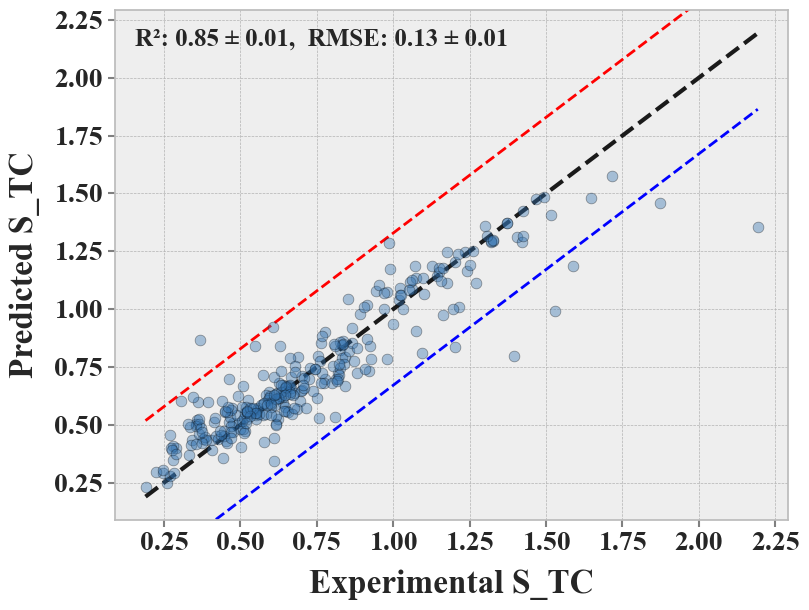

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 用实验值的标准差 σ 作为偏差带
sigma = np.std(all_actuals)

# 构建理想线的x和y值
x_vals = np.linspace(all_actuals.min(), all_actuals.max(), 100)
y_vals = x_vals
ci_upper = y_vals + sigma     # 上界线 y = x + σ
ci_lower = y_vals - sigma     # 下界线 y = x - σ

# 绘图
plt.figure(figsize=(8.5, 6.5))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 20
plt.style.use('bmh')

# 误差容忍带线（±σ）
plt.plot(x_vals, ci_upper, color='red', linestyle='--', linewidth=2, zorder=1, label='±1 σ upper')
plt.plot(x_vals, ci_lower, color='blue', linestyle='--', linewidth=2, zorder=1, label='±1 σ lower')

# 理想线 y = x
plt.plot(x_vals, y_vals, 'k--', lw=3, zorder=1, label='Ideal: y = x')

# 散点图（添加黑色边框，zorder更高）
plt.scatter(all_actuals, all_predictions, alpha=0.4, marker='o', color='#3574B1', edgecolors='black', s=60, zorder=2)

# R² 和 MAE 注释
# plt.text(0.03, 0.93, f'( {result["r2_val"]}, {result["mae_val"]}, {result["nmae_val"]} )', fontsize=18, transform=plt.gca().transAxes)
plt.text(0.03, 0.93, f'R²: {result["r2_val"]},  RMSE: {result["rmse_val"]}', fontsize=18, transform=plt.gca().transAxes)

# 标签和样式
plt.xlabel('Experimental S_TC', weight='bold', fontsize=24, fontname='Times New Roman', labelpad=10)
plt.ylabel('Predicted S_TC', weight='bold', fontsize=24, fontname='Times New Roman', labelpad=10)
plt.xticks(fontsize=20, weight='bold', )
plt.yticks(fontsize=20, weight='bold')
plt.tick_params(axis='both', which='both', direction='out', length=5, width=1.5, color='gray', bottom=True, top=False, left=True, right=False)

# 保证横纵坐标一致
min_val = min(all_actuals.min(), all_predictions.min())
max_val = max(all_actuals.max(), all_predictions.max())
plt.xlim(min_val - 0.1, max_val + 0.1)
plt.ylim(min_val - 0.1, max_val + 0.1)

plt.tight_layout()
plt.show()
